**Author: Matheus Costa da Fonseca**

**Github:** github.com/matheus-costa

Semana Acadêmica - Aprendizado de Máquina Para Prever Cirurgia em Equinos - Decision Tree - Horse Colic

 Link do Collab : https://colab.research.google.com/drive/1E7u1zF7IgTg84D23-a9jBxttF8qjc4D9#scrollTo=I86jhW_DsaWb

In [1]:
#!/bin/bash
!curl -L -o ~/Downloads/horse-colic.zip\
!https://www.kaggle.com/api/v1/datasets/download/uciml/horse-colic
!unzip -u horse-colic.zip

curl: (3) URL using bad/illegal format or missing URL
unzip:  cannot find or open horse-colic.zip, horse-colic.zip.zip or horse-colic.zip.ZIP.


In [2]:
#IMPORTANDO AS BIBLIOTECAS QUE SERÃO USADAS
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Criando a variavel data, contendo a base de dados de cavalos
data = pd.read_csv("horse.csv")

#renomeando o  nome das colunas do database
data.columns = ['Surgery','Age','Hospital Number','Rectal Temperature','Pulse','Respiratory Rate','Temperature of Extremities','Peripheral Pulse','Mucous Membranes','Capillary Refill Time','Pain','Peristalsis','Abdominal Distension','Nasogastric Tube','Nasogastric Reflux','Nasogastric Reflux PH','Rectal Examination Feces','Abdomen','Packed Cell Volume','Total Protein','Abdominocentesis Appearance','Abdominocentesis Total Protein','Outcome','Surgical Lesion','Lesion Site','Lesion Type','Lesion Subtype','CP Data']

#Mostra as 5 primeiras linhas do dataFrame
data.head() # Show first 5 samples



,Surgery,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdominocentesis Total Protein,Outcome,Surgical Lesion,Lesion Site,Lesion Type,Lesion Subtype,CP Data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [3]:
#mostrando o tipo de variável/ valor que tem em cada coluna do database
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Surgery                         299 non-null    object 
 1   Age                             299 non-null    object 
 2   Hospital Number                 299 non-null    int64  
 3   Rectal Temperature              239 non-null    float64
 4   Pulse                           275 non-null    float64
 5   Respiratory Rate                241 non-null    float64
 6   Temperature of Extremities      243 non-null    object 
 7   Peripheral Pulse                230 non-null    object 
 8   Mucous Membranes                252 non-null    object 
 9   Capillary Refill Time           267 non-null    object 
 10  Pain                            244 non-null    object 
 11  Peristalsis                     255 non-null    object 
 12  Abdominal Distension            243 

In [4]:
#mostrando os valores nulos do database
data.isnull().sum()

,0
Surgery,0
Age,0
Hospital Number,0
Rectal Temperature,60
Pulse,24
Respiratory Rate,58
Temperature of Extremities,56
Peripheral Pulse,69
Mucous Membranes,47
Capillary Refill Time,32




```
# Isto está formatado como código
```

**Tratamento de Valores Nulos**

In [5]:
# Rectal Temperature
from sklearn.impute import SimpleImputer
import numpy as np

# Exibe as dimensões originais do DataFrame (número de linhas e colunas)
print("Original DataFrame Dimensions:", data.shape)
# Mostra estatísticas descritivas da coluna 'Rectal Temperature' (média, desvio padrão, min, max, etc.)
print(data['Rectal Temperature'].describe())
# Cria um objeto SimpleImputer que substituirá os valores ausentes (NaN) pela média da coluna
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Ajusta (fit) o imputador na coluna 'Rectal Temperature' — calcula a média da coluna
imp_mean.fit(data[['Rectal Temperature']])
# Aplica a transformação para preencher os valores ausentes com a média e imprime o resultado
print(imp_mean.transform(data[['Rectal Temperature']]))


Original DataFrame Dimensions: (299, 28)
count    239.000000
mean      38.168619
std        0.733744
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: Rectal Temperature, dtype: float64
[[38.5       ]
 [39.2       ]
 [38.3       ]
 [39.1       ]
 [37.3       ]
 [38.16861925]
 [37.9       ]
 [38.16861925]
 [38.16861925]
 [38.3       ]
 [38.1       ]
 [39.1       ]
 [37.2       ]
 [38.        ]
 [38.2       ]
 [37.6       ]
 [38.16861925]
 [37.5       ]
 [37.6       ]
 [39.4       ]
 [39.9       ]
 [38.4       ]
 [38.6       ]
 [38.3       ]
 [38.1       ]
 [37.8       ]
 [38.3       ]
 [37.8       ]
 [38.16861925]
 [37.7       ]
 [37.7       ]
 [37.2       ]
 [37.2       ]
 [38.2       ]
 [38.16861925]
 [38.16861925]
 [38.3       ]
 [37.8       ]
 [38.6       ]
 [39.2       ]
 [38.16861925]
 [39.        ]
 [38.        ]
 [38.16861925]
 [35.4       ]
 [38.16861925]
 [37.9       ]
 [37.5       ]
 [38.9       ]
 [37.2       ]
 [38.6  

In [6]:
#mostrando os valores nulos do database
data.isnull().sum()

,0
Surgery,0
Age,0
Hospital Number,0
Rectal Temperature,60
Pulse,24
Respiratory Rate,58
Temperature of Extremities,56
Peripheral Pulse,69
Mucous Membranes,47
Capillary Refill Time,32


In [7]:
#PULSE
print("Original DataFrame Dimensions:",data.shape)
print(data['Pulse'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Pulse']])
print(imp_mean.transform(data[['Pulse']]))

Original DataFrame Dimensions: (299, 28)
count    275.000000
mean      72.000000
std       28.646219
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: Pulse, dtype: float64
[[ 66.]
 [ 88.]
 [ 40.]
 [164.]
 [104.]
 [ 72.]
 [ 48.]
 [ 60.]
 [ 80.]
 [ 90.]
 [ 66.]
 [ 72.]
 [ 42.]
 [ 92.]
 [ 76.]
 [ 96.]
 [128.]
 [ 48.]
 [ 64.]
 [110.]
 [ 72.]
 [ 48.]
 [ 42.]
 [130.]
 [ 60.]
 [ 60.]
 [ 72.]
 [ 48.]
 [ 72.]
 [ 48.]
 [ 96.]
 [108.]
 [ 60.]
 [ 64.]
 [100.]
 [104.]
 [112.]
 [ 72.]
 [ 52.]
 [146.]
 [ 88.]
 [150.]
 [ 60.]
 [120.]
 [140.]
 [120.]
 [ 60.]
 [ 48.]
 [ 80.]
 [ 84.]
 [ 46.]
 [ 84.]
 [ 72.]
 [ 40.]
 [114.]
 [160.]
 [ 72.]
 [ 64.]
 [ 72.]
 [ 96.]
 [ 48.]
 [ 60.]
 [ 88.]
 [130.]
 [ 64.]
 [ 60.]
 [ 72.]
 [ 54.]
 [ 52.]
 [ 48.]
 [ 60.]
 [ 48.]
 [ 56.]
 [ 52.]
 [ 72.]
 [100.]
 [ 38.]
 [ 52.]
 [ 72.]
 [ 96.]
 [ 98.]
 [ 40.]
 [100.]
 [ 72.]
 [ 60.]
 [ 54.]
 [ 88.]
 [ 40.]
 [ 64.]
 [ 42.]
 [ 52.]
 [114.]
 [ 50.]
 [ 72.]
 [ 48.]
 [ 48.]
 [ 

In [8]:
#Respiratory Rate
print("Original DataFrame Dimensions:",data.shape)
print(data['Respiratory Rate'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Respiratory Rate']])
print(imp_mean.transform(data[['Respiratory Rate']]))

Original DataFrame Dimensions: (299, 28)
count    241.000000
mean      30.460581
std       17.666102
min        8.000000
25%       18.000000
50%       25.000000
75%       36.000000
max       96.000000
Name: Respiratory Rate, dtype: float64
[[28.        ]
 [20.        ]
 [24.        ]
 [84.        ]
 [35.        ]
 [30.46058091]
 [16.        ]
 [30.46058091]
 [36.        ]
 [30.46058091]
 [12.        ]
 [52.        ]
 [12.        ]
 [28.        ]
 [28.        ]
 [48.        ]
 [36.        ]
 [24.        ]
 [21.        ]
 [35.        ]
 [60.        ]
 [16.        ]
 [34.        ]
 [60.        ]
 [12.        ]
 [42.        ]
 [30.        ]
 [12.        ]
 [30.46058091]
 [30.46058091]
 [30.        ]
 [12.        ]
 [30.46058091]
 [28.        ]
 [30.        ]
 [24.        ]
 [16.        ]
 [30.46058091]
 [30.46058091]
 [96.        ]
 [30.46058091]
 [72.        ]
 [12.        ]
 [30.46058091]
 [24.        ]
 [30.46058091]
 [15.        ]
 [16.        ]
 [44.        ]
 [48.        ]
 [30.46058

In [9]:
#Hospital Number

print("Original DataFrame Dimensions:",data.shape)
print(data['Hospital Number'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Hospital Number']])
print(imp_mean.transform(data[['Hospital Number']]))

Original DataFrame Dimensions: (299, 28)
count    2.990000e+02
mean     1.087733e+06
std      1.532032e+06
min      5.184760e+05
25%      5.289040e+05
50%      5.303010e+05
75%      5.347360e+05
max      5.305629e+06
Name: Hospital Number, dtype: float64
[[ 530101.]
 [ 534817.]
 [ 530334.]
 [5290409.]
 [ 530255.]
 [ 528355.]
 [ 526802.]
 [ 529607.]
 [ 530051.]
 [5299629.]
 [ 528548.]
 [ 527927.]
 [ 528031.]
 [5291329.]
 [ 534917.]
 [ 530233.]
 [5301219.]
 [ 526639.]
 [5290481.]
 [ 532110.]
 [ 530157.]
 [ 529340.]
 [ 521681.]
 [ 534998.]
 [ 533692.]
 [ 529518.]
 [ 530526.]
 [ 528653.]
 [5279442.]
 [ 535415.]
 [ 529475.]
 [ 530242.]
 [ 529427.]
 [ 529663.]
 [ 529796.]
 [ 528812.]
 [ 529493.]
 [ 533847.]
 [ 528996.]
 [5277409.]
 [ 529498.]
 [5288249.]
 [ 530301.]
 [ 534069.]
 [ 535407.]
 [ 529827.]
 [ 529888.]
 [ 529821.]
 [ 528890.]
 [ 529642.]
 [ 529766.]
 [ 527706.]
 [ 529483.]
 [ 530544.]
 [ 529461.]
 [5282839.]
 [ 528872.]
 [ 529640.]
 [ 528298.]
 [ 528904.]
 [ 530438.]
 [ 527957.]
 

In [10]:
#Nasogastric Reflux PH
print("Original DataFrame Dimensions:",data.shape)
print(data['Nasogastric Reflux PH'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Nasogastric Reflux PH']])
print(imp_mean.transform(data[['Nasogastric Reflux PH']]))

Original DataFrame Dimensions: (299, 28)
count    53.000000
mean      4.707547
std       1.982311
min       1.000000
25%       3.000000
50%       5.000000
75%       6.500000
max       7.500000
Name: Nasogastric Reflux PH, dtype: float64
[[4.70754717]
 [4.70754717]
 [4.70754717]
 [5.        ]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [3.        ]
 [4.70754717]
 [4.70754717]
 [7.2       ]
 [4.70754717]
 [4.5       ]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [5.5       ]
 [4.70754717]
 [4.70754717]
 [2.        ]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.        ]
 [6.        ]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [7.        ]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [4.70754717]
 [7.   

In [11]:
#PACKED CELL VOLUME
print("Original DataFrame Dimensions:",data.shape)
print(data['Packed Cell Volume'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Packed Cell Volume']])
print(imp_mean.transform(data[['Packed Cell Volume']]))

Original DataFrame Dimensions: (299, 28)
count    270.000000
mean      46.307407
std       10.436743
min       23.000000
25%       38.000000
50%       45.000000
75%       52.000000
max       75.000000
Name: Packed Cell Volume, dtype: float64
[[45.        ]
 [50.        ]
 [33.        ]
 [48.        ]
 [74.        ]
 [46.30740741]
 [37.        ]
 [44.        ]
 [38.        ]
 [40.        ]
 [44.        ]
 [50.        ]
 [46.30740741]
 [37.        ]
 [46.        ]
 [45.        ]
 [53.        ]
 [46.30740741]
 [40.        ]
 [55.        ]
 [46.        ]
 [49.        ]
 [48.        ]
 [50.        ]
 [51.        ]
 [46.30740741]
 [43.        ]
 [37.        ]
 [46.30740741]
 [45.        ]
 [66.        ]
 [52.        ]
 [43.        ]
 [49.        ]
 [52.        ]
 [73.        ]
 [51.        ]
 [56.        ]
 [32.        ]
 [46.30740741]
 [63.        ]
 [47.        ]
 [47.        ]
 [52.        ]
 [57.        ]
 [60.        ]
 [65.        ]
 [37.        ]
 [54.        ]
 [73.        ]
 [49.   

In [12]:
#TOTAL PROTEIN
print("Original DataFrame Dimensions:",data.shape)
print(data['Total Protein'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Total Protein']])
print(imp_mean.transform(data[['Total Protein']]))

Original DataFrame Dimensions: (299, 28)
count    266.000000
mean      24.274436
std       27.364194
min        3.300000
25%        6.500000
50%        7.500000
75%       56.750000
max       89.000000
Name: Total Protein, dtype: float64
[[ 8.4       ]
 [85.        ]
 [ 6.7       ]
 [ 7.2       ]
 [ 7.4       ]
 [24.27443609]
 [ 7.        ]
 [ 8.3       ]
 [ 6.2       ]
 [ 6.2       ]
 [ 6.        ]
 [ 7.8       ]
 [ 7.        ]
 [ 6.1       ]
 [81.        ]
 [ 6.8       ]
 [ 7.8       ]
 [24.27443609]
 [ 7.        ]
 [ 8.7       ]
 [ 6.1       ]
 [ 6.8       ]
 [ 7.2       ]
 [70.        ]
 [65.        ]
 [24.27443609]
 [ 7.        ]
 [ 5.5       ]
 [24.27443609]
 [76.        ]
 [ 7.5       ]
 [ 8.2       ]
 [ 6.6       ]
 [ 8.6       ]
 [ 6.6       ]
 [ 8.4       ]
 [ 6.        ]
 [80.        ]
 [ 6.6       ]
 [24.27443609]
 [ 6.5       ]
 [ 8.5       ]
 [ 7.        ]
 [67.        ]
 [69.        ]
 [ 6.5       ]
 [ 7.5       ]
 [ 6.5       ]
 [ 6.5       ]
 [ 5.5       ]
 [ 9.1       

In [13]:
#Abdominocentesis Total Protein
print("Original DataFrame Dimensions:",data.shape)
print(data['Abdominocentesis Total Protein'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Abdominocentesis Total Protein']])
print(imp_mean.transform(data[['Abdominocentesis Total Protein']]))

Original DataFrame Dimensions: (299, 28)
count    101.000000
mean       3.039604
std        1.967947
min        0.100000
25%        2.000000
50%        2.300000
75%        3.900000
max       10.100000
Name: Abdominocentesis Total Protein, dtype: float64
[[ 3.03960396]
 [ 2.        ]
 [ 3.03960396]
 [ 5.3       ]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 2.2       ]
 [ 3.6       ]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 2.        ]
 [ 3.03960396]
 [ 4.7       ]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.9       ]
 [ 1.3       ]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 7.4       ]
 [ 3.03960396]
 [ 6.6       ]
 [ 3.03960396]
 [ 3.03960396]
 [ 1.        ]
 [ 2.        ]
 [ 5.        ]
 [ 3.03960396]
 [ 3.03960396]
 [ 0.1       ]
 [ 3.03960396]
 [ 2.        ]
 [ 2.        ]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 3.03960396]
 [ 4.1     

In [14]:
#mostrando os valores nulos do database
data.isnull().sum()

,0
Surgery,0
Age,0
Hospital Number,0
Rectal Temperature,60
Pulse,24
Respiratory Rate,58
Temperature of Extremities,56
Peripheral Pulse,69
Mucous Membranes,47
Capillary Refill Time,32


# **Tratamento de Nulos**





In [15]:
# Preenchendo valores ausentes usando o valor mais frequente (moda)
# Exibe as dimensões originais do DataFrame (linhas, colunas)
print("Original DataFrame Dimensions:", data.shape)
# Mostra a contagem de cada valor presente na coluna 'Age'
print(data['Age'].value_counts())
# Cria um objeto SimpleImputer que irá substituir valores ausentes (NaN)
# usando a estratégia do valor mais frequente na coluna
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
# Ajusta (fit) o imputador nos dados da coluna 'Age' — aprende qual é o valor mais frequente
imp_mean.fit(data[['Age']])
# Aplica a transformação para preencher os valores ausentes e imprime o resultado
print(imp_mean.transform(data[['Age']]))


Original DataFrame Dimensions: (299, 28)
Age
adult    275
young     24
Name: count, dtype: int64
[['adult']
 ['adult']
 ['adult']
 ['young']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['young']
 ['adult']
 ['adult']
 ['adult']
 ['young']
 ['adult']
 ['adult']
 ['young']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['young']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['young']
 ['adult']
 ['young']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['young']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['young']
 ['young']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 ['adult']
 

# **Transformando as colunas objects em dados numéricos**

In [16]:
from sklearn.preprocessing import LabelEncoder
#usando label enconder para converter as variáveis categoricas
encoder = LabelEncoder()

data['Surgery'] = encoder.fit_transform(data['Surgery'])
data['Age'] = encoder.fit_transform(data['Age'])
data['Temperature of Extremities'] = encoder.fit_transform(data['Temperature of Extremities'])
data['Peripheral Pulse'] = encoder.fit_transform(data['Peripheral Pulse'])
data['Mucous Membranes'] = encoder.fit_transform(data['Mucous Membranes'])
data['Capillary Refill Time'] = encoder.fit_transform(data['Capillary Refill Time'])
data['Pain'] = encoder.fit_transform(data['Pain'])
data['Peristalsis'] = encoder.fit_transform(data['Peristalsis'])
data['Abdominal Distension'] = encoder.fit_transform(data['Abdominal Distension'])
data['Nasogastric Tube'] = encoder.fit_transform(data['Nasogastric Tube'])
data['Nasogastric Reflux'] = encoder.fit_transform(data['Nasogastric Reflux'])
data['Rectal Examination Feces'] = encoder.fit_transform(data['Rectal Examination Feces'])
data['Abdomen'] = encoder.fit_transform(data['Abdomen'])
data['Abdominocentesis Appearance'] = encoder.fit_transform(data['Abdominocentesis Appearance'])
data['Outcome'] = encoder.fit_transform(data['Outcome'])
data['Surgical Lesion'] = encoder.fit_transform(data['Surgical Lesion'])
data['CP Data'] = encoder.fit_transform(data['CP Data'])

data.head()


,Surgery,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdominocentesis Total Protein,Outcome,Surgical Lesion,Lesion Site,Lesion Type,Lesion Subtype,CP Data
0,0,0,530101,38.5,66.0,28.0,1,3,6,2,...,45.0,8.4,3,NaN,0,0,11300,0,0,0
1,1,0,534817,39.2,88.0,20.0,4,4,4,1,...,50.0,85.0,1,2.0,1,0,2208,0,0,0
2,0,0,530334,38.3,40.0,24.0,2,2,5,1,...,33.0,6.7,3,NaN,2,0,0,0,0,1
3,1,1,5290409,39.1,164.0,84.0,0,2,2,2,...,48.0,7.2,2,5.3,0,1,2208,0,0,1
4,0,0,530255,37.3,104.0,35.0,4,4,2,2,...,74.0,7.4,3,NaN,0,0,4300,0,0,0


VERIFICANDO VALORES NULOS

In [17]:
data.isnull().sum()

,0
Surgery,0
Age,0
Hospital Number,0
Rectal Temperature,60
Pulse,24
Respiratory Rate,58
Temperature of Extremities,0
Peripheral Pulse,0
Mucous Membranes,0
Capillary Refill Time,0


In [18]:
data['Pulse'] = encoder.fit_transform(data['Pulse'])


In [19]:
#PULSE
print("Original DataFrame Dimensions:",data.shape)
print(data['Pulse'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Pulse']])
#print(imp_mean.transform(data[['Pulse']]))

print("Original DataFrame Dimensions:", data.shape)
print(data['Rectal Temperature'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Rectal Temperature']])
print(imp_mean.transform(data[['Rectal Temperature']]))

print("Original DataFrame Dimensions:", data.shape)
print(data['Respiratory Rate'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Respiratory Rate']])
print(imp_mean.transform(data[['Respiratory Rate']]))

Original DataFrame Dimensions: (299, 28)
count    299.000000
mean      21.632107
std       14.964783
min        0.000000
25%        8.500000
50%       18.000000
75%       32.500000
max       52.000000
Name: Pulse, dtype: float64
Original DataFrame Dimensions: (299, 28)
count    239.000000
mean      38.168619
std        0.733744
min       35.400000
25%       37.800000
50%       38.200000
75%       38.500000
max       40.800000
Name: Rectal Temperature, dtype: float64
[[38.5       ]
 [39.2       ]
 [38.3       ]
 [39.1       ]
 [37.3       ]
 [38.16861925]
 [37.9       ]
 [38.16861925]
 [38.16861925]
 [38.3       ]
 [38.1       ]
 [39.1       ]
 [37.2       ]
 [38.        ]
 [38.2       ]
 [37.6       ]
 [38.16861925]
 [37.5       ]
 [37.6       ]
 [39.4       ]
 [39.9       ]
 [38.4       ]
 [38.6       ]
 [38.3       ]
 [38.1       ]
 [37.8       ]
 [38.3       ]
 [37.8       ]
 [38.16861925]
 [37.7       ]
 [37.7       ]
 [37.2       ]
 [37.2       ]
 [38.2       ]
 [38.16861925]
 [38

In [20]:
data.isnull().sum()

,0
Surgery,0
Age,0
Hospital Number,0
Rectal Temperature,60
Pulse,0
Respiratory Rate,58
Temperature of Extremities,0
Peripheral Pulse,0
Mucous Membranes,0
Capillary Refill Time,0


In [21]:
#TRATANDO DADOS FALTANTES DAS COLUNAS RECEM CONVERTIDAS

print("Original DataFrame Dimensions:",data.shape)
print(data['Surgery'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Surgery']])
print(imp_mean.transform(data[['Surgery']]))
print("Divisoria Surgery")

print("Original DataFrame Dimensions:",data.shape)
print(data['Age'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Age']])
print(imp_mean.transform(data[['Age']]))
print("Divisoria Age")

print("Original DataFrame Dimensions:",data.shape)
print(data['Temperature of Extremities'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Temperature of Extremities']])
print(imp_mean.transform(data[['Temperature of Extremities']]))
print("Divisoria Temperature of Extremities")

print("Original DataFrame Dimensions:",data.shape)
print(data['Peripheral Pulse'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Peripheral Pulse']])
print(imp_mean.transform(data[['Peripheral Pulse']]))
print("Divisoria Peripheral Pulse")


print("Original DataFrame Dimensions:",data.shape)
print(data['Mucous Membranes'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Mucous Membranes']])
print(imp_mean.transform(data[['Mucous Membranes']]))
print("Divisoria Mucous Membranes")

print("Original DataFrame Dimensions:",data.shape)
print(data['Capillary Refill Time'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Capillary Refill Time']])
print(imp_mean.transform(data[['Capillary Refill Time']]))
print("Divisoria Capillary Refill Time")

#10
print("Original DataFrame Dimensions:",data.shape)
print(data['Pain'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Pain']])
print(imp_mean.transform(data[['Pain']]))
print("Divisoria Pain")

#11
print("Original DataFrame Dimensions:",data.shape)
print(data['Peristalsis'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Peristalsis']])
print(imp_mean.transform(data[['Peristalsis']]))
print("Divisoria Peristalsis")

#12
print("Original DataFrame Dimensions:",data.shape)
print(data['Abdominal Distension'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Abdominal Distension']])
print(imp_mean.transform(data[['Abdominal Distension']]))
print("Divisoria Abdominal Distension")

#13
print("Original DataFrame Dimensions:",data.shape)
print(data['Nasogastric Tube'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Nasogastric Tube']])
print(imp_mean.transform(data[['Nasogastric Tube']]))
print("Divisoria Nasogastric Tube")

#14
print("Original DataFrame Dimensions:",data.shape)
print(data['Nasogastric Reflux'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Nasogastric Reflux']])
print(imp_mean.transform(data[['Nasogastric Reflux']]))
print("Divisoria Nasogastric Reflux")

#15
print("Original DataFrame Dimensions:",data.shape)
print(data['Rectal Examination Feces'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Rectal Examination Feces']])
print(imp_mean.transform(data[['Rectal Examination Feces']]))
print("Divisoria Rectal Examination Feces")

#16
print("Original DataFrame Dimensions:",data.shape)
print(data['Rectal Examination Feces'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Rectal Examination Feces']])
print(imp_mean.transform(data[['Rectal Examination Feces']]))
print("Divisoria Rectal Examination Feces")


#17
print("Original DataFrame Dimensions:",data.shape)
print(data['Abdomen'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Abdomen']])
print(imp_mean.transform(data[['Abdomen']]))
print("Divisoria Abdomen")

#20
print("Original DataFrame Dimensions:",data.shape)
print(data['Abdominocentesis Appearance'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Abdominocentesis Appearance']])
print(imp_mean.transform(data[['Abdominocentesis Appearance']]))
print("Divisoria Abdominocentesis Appearance")

#22
print("Original DataFrame Dimensions:",data.shape)
print(data['Outcome'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Outcome']])
print(imp_mean.transform(data[['Outcome']]))
print("Divisoria Outcome")

#23
print("Original DataFrame Dimensions:",data.shape)
print(data['Surgical Lesion'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['Surgical Lesion']])
print(imp_mean.transform(data[['Surgical Lesion']]))
print("Divisoria Surgical Lesion")



#27
print("Original DataFrame Dimensions:",data.shape)
print(data['CP Data'].describe())
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean.fit(data[['CP Data']])
print(imp_mean.transform(data[['CP Data']]))
print("Divisoria CP Data")

A saída de streaming foi truncada nas últimas 5000 linhas.
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Divisoria Age
Original DataFrame Dimensions: (299, 28)
count    299.00000
mean       1.93311
std        1.25407
min        0.00000
25%        1.00000
50%        2.00000
75%        3.00000
max        4.00000
Name: Temperature of Extremities, dtype: float64
[[1.]
 [4.]
 [2.]
 [0.]
 [4.]
 [3.]
 [2.]
 [1.]
 [1.]
 [2.]
 [1.]
 [3.]
 [3.]
 [2.]
 [1.]
 [1.]
 [1.]
 [4.]
 [2.]
 [0.]
 [2.]
 [2.]
 [3.]
 [4.]
 [1.]
 [4.]
 [0.]
 [1.]
 [4.]
 [3.]
 [1.]
 [1.]
 [3.]
 [2.]
 [1.]
 [0.]
 [4.]
 [4.]
 [2.]
 [4.]
 [1.]
 [4.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [2.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [4.]
 [1.]
 [1.]
 [4.]
 [3.]
 [0.]
 [1.]
 [2.]
 [3.]
 [3.]
 [0.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [1.]
 [2.]
 [4.]
 [2.]
 [4.]


In [22]:
#mostrando os valores nulos do database
data.isnull().sum()

,0
Surgery,0
Age,0
Hospital Number,0
Rectal Temperature,60
Pulse,0
Respiratory Rate,58
Temperature of Extremities,0
Peripheral Pulse,0
Mucous Membranes,0
Capillary Refill Time,0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Surgery                         299 non-null    int64  
 1   Age                             299 non-null    int64  
 2   Hospital Number                 299 non-null    int64  
 3   Rectal Temperature              239 non-null    float64
 4   Pulse                           299 non-null    int64  
 5   Respiratory Rate                241 non-null    float64
 6   Temperature of Extremities      299 non-null    int64  
 7   Peripheral Pulse                299 non-null    int64  
 8   Mucous Membranes                299 non-null    int64  
 9   Capillary Refill Time           299 non-null    int64  
 10  Pain                            299 non-null    int64  
 11  Peristalsis                     299 non-null    int64  
 12  Abdominal Distension            299 

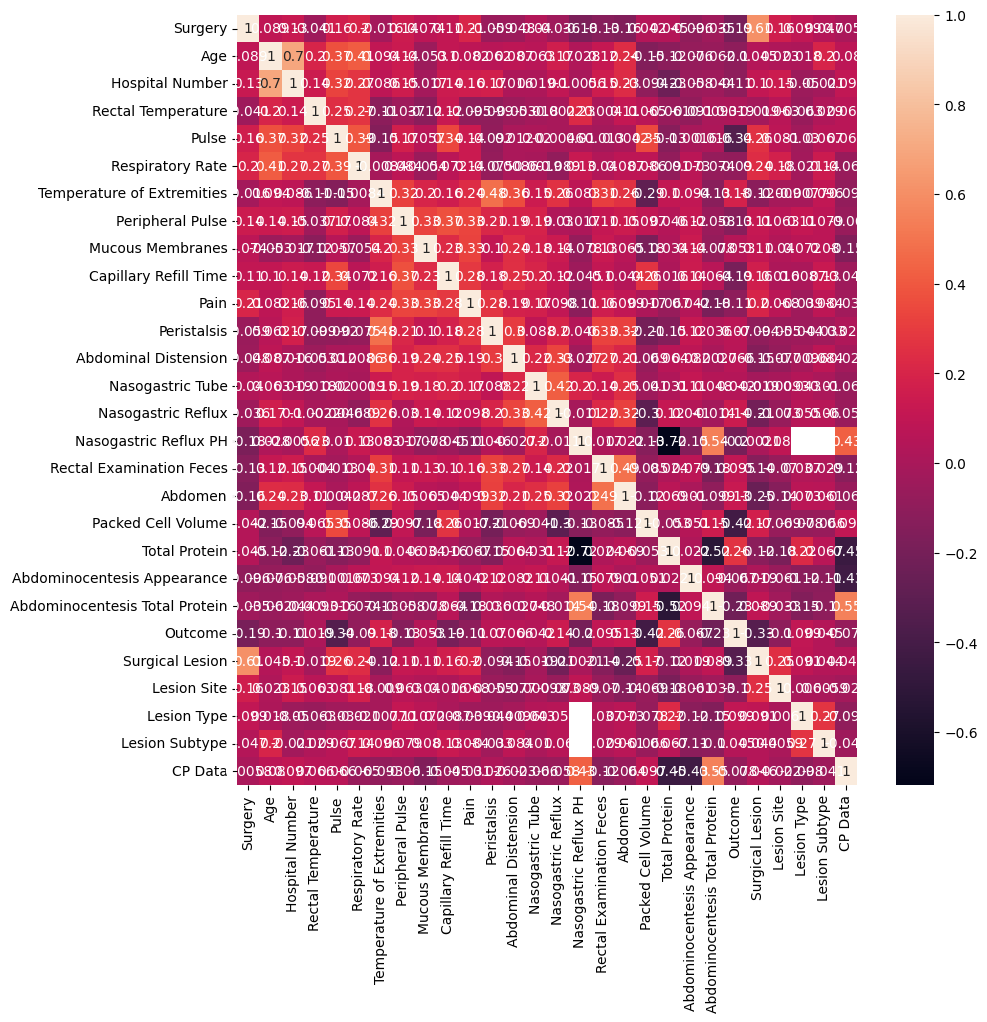

In [24]:


correlacao = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlacao, annot=True)
plt.show()

Separando as variaveis em X e Y

In [25]:
#excluindo a coluna Surgery do DataBase e atribuindo o restante á variviavel X
#selecionando apenas os valores da coluna Surgery
X = data.drop('Surgery', axis=1).values
y = data['Surgery'].values

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Aplicando o modelo de arvore de decisão

In [27]:
from sklearn.tree import DecisionTreeClassifier


In [28]:
dte = DecisionTreeClassifier()

In [29]:
dte.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier()>

In [30]:
dte.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
score_treino = dte.score(X_train, y_train)


In [32]:
score_treino

1.0

In [33]:
Y_previsto = dte.predict(X_test)

In [34]:
score_teste = dte.score(X_test, y_test)

In [35]:
print(score_teste)

0.7066666666666667


Gerando Matriz de confusão para comarar resultados

In [36]:
from sklearn.metrics import confusion_matrix

In [37]:
cm = confusion_matrix(y_test, Y_previsto)

In [38]:
cm

array([[13, 10],
       [12, 40]])

<Axes: >

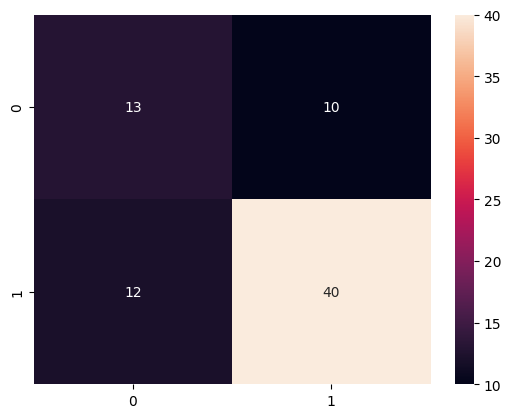

In [39]:
sns.heatmap(cm, annot=True, fmt="d")

In [40]:
from sklearn.metrics import classification_report, f1_score, precision_score, average_precision_score, recall_score

In [41]:
cr = classification_report(y_test, Y_previsto,labels=[0,1] )
print(cr)

              precision    recall  f1-score   support

           0       0.52      0.57      0.54        23
           1       0.80      0.77      0.78        52

    accuracy                           0.71        75
   macro avg       0.66      0.67      0.66        75
weighted avg       0.71      0.71      0.71        75



In [42]:
f1 = f1_score(y_test, Y_previsto,  average='macro')
print("f1 SOCRE = {:0.2F}%".format(f1*100))

f1 SOCRE = 66.30%


# PRECISÃO

In [43]:
precisao = precision_score(y_test, Y_previsto, average='macro')
print("PRECISAO = {:0.2F}%".format(precisao*100))

PRECISAO = 66.00%


# Average precision score

In [44]:
avg_precision = average_precision_score(y_test, Y_previsto)
print("Average precision-recall score: {0:0.2f}".format(avg_precision*100))

Average precision-recall score: 77.54


# **Criando uma variavel com colunas usadas por veterinários**

In [45]:
dados_avaliado_veterinarios = data[['Pain', 'Pulse','Peristalsis', 'Abdominal Distension', 'Respiratory Rate', 'Surgery','Temperature of Extremities']]
#peristalsis
dados_avaliado_veterinarios2 = data[['Peripheral Pulse', 'Capillary Refill Time','Rectal Temperature', 'Mucous Membranes', 'Abdomen', 'Surgery','Packed Cell Volume']]
#mucous Membranes
dados_avaliado_veterinarios3 = data[['Abdominal Distension', 'Respiratory Rate','Pulse', 'Pain', 'Total Protein', 'Surgery']]
#Respiratory Rate
dados_avaliado_veterinarios4 = data[['Abdominal Distension', 'Nasogastric Reflux','Pulse', 'Pain', 'Peristalsis','Capillary Refill Time', 'Surgery']]

dados_avaliado_veterinario5 = data[['Hospital Number', 'Outcome','Surgical Lesion', 'Lesion Site', 'Lesion Type','Lesion Subtype', 'CP Data', 'Surgery']]


In [46]:
dados_avaliado_veterinario5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Hospital Number  299 non-null    int64
 1   Outcome          299 non-null    int64
 2   Surgical Lesion  299 non-null    int64
 3   Lesion Site      299 non-null    int64
 4   Lesion Type      299 non-null    int64
 5   Lesion Subtype   299 non-null    int64
 6   CP Data          299 non-null    int64
 7   Surgery          299 non-null    int64
dtypes: int64(8)
memory usage: 18.8 KB


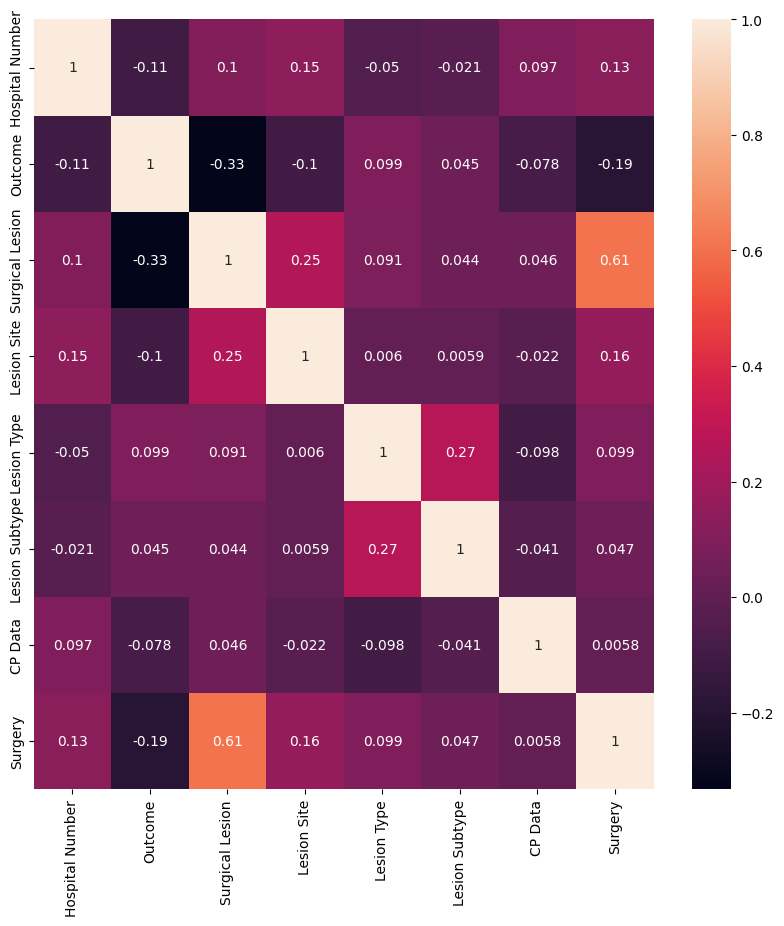

In [47]:
correlacao = dados_avaliado_veterinario5.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlacao, annot=True)
plt.show()

In [48]:
x = dados_avaliado_veterinario5.drop('Surgery', axis=1).values
y = dados_avaliado_veterinario5['Surgery'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [50]:
from sklearn.tree import DecisionTreeClassifier


In [51]:
cm = confusion_matrix(y_test, Y_previsto)

<Axes: >

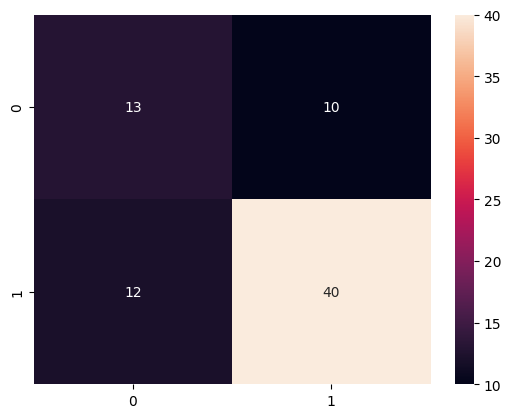

In [52]:
sns.heatmap(cm, annot=True, fmt="d")

In [53]:
from sklearn.metrics import classification_report, f1_score, precision_score, average_precision_score, recall_score

In [54]:
cr = classification_report(y_test, Y_previsto,labels=[0,1] )
print(cr)

              precision    recall  f1-score   support

           0       0.52      0.57      0.54        23
           1       0.80      0.77      0.78        52

    accuracy                           0.71        75
   macro avg       0.66      0.67      0.66        75
weighted avg       0.71      0.71      0.71        75



In [55]:
f1 = f1_score(y_test, Y_previsto,  average='macro')
print("f1 SOCRE = {:0.2F}%".format(f1*100))

f1 SOCRE = 66.30%


In [56]:
avg_precision = average_precision_score(y_test, Y_previsto)
print("Average precision-recall score: {0:0.2f}".format(avg_precision*100))

Average precision-recall score: 77.54


Clustering K-Means


In [57]:
data.isnull()

,Surgery,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdominocentesis Total Protein,Outcome,Surgical Lesion,Lesion Site,Lesion Type,Lesion Subtype,CP Data
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [58]:
from scipy import stats
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer


PULO DO GATO

In [ ]:
# Cria o imputador que preenche NaN com a média dos dados
imputer = SimpleImputer(strategy='mean')
# Aplica imputação
X_imputado = imputer.fit_transform(data)
X_imputado = pd.DataFrame(X_imputado, columns=data.columns)
#verifica os NAN
print(X_imputado.isnull().sum())

data = X_imputado



In [ ]:
data.isnull().sum()

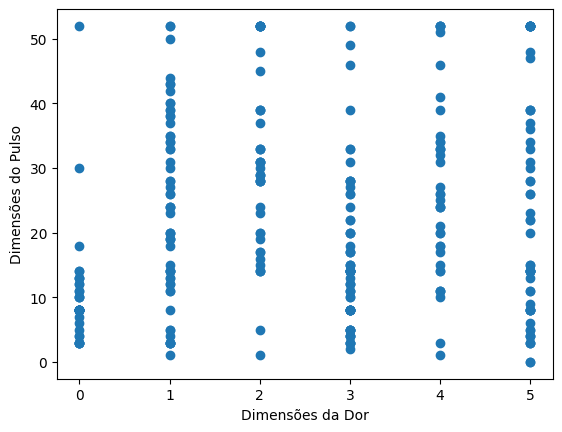

In [61]:
plt.scatter(data['Pain'], data['Pulse'])
plt.xlabel("Dimensões da Dor")
plt.ylabel("Dimensões do Pulso")
plt.show()

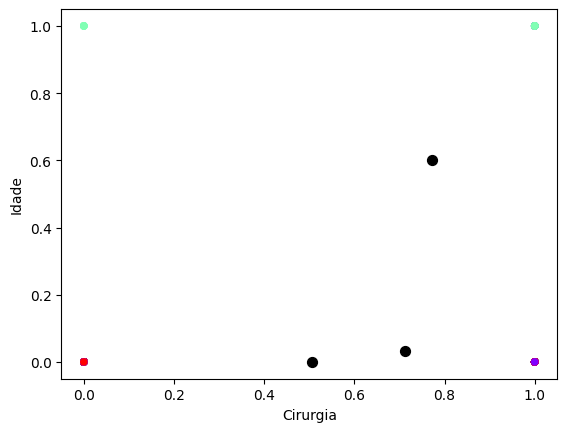

In [62]:
#cria o modelo de cluster KMeans com 3 clusters
est = KMeans(3)

#treina o modelo com os dados do Data Base
est.fit(data)

#faz a previsão dos cluters para cada ponto dos dados
y_kmeans = est.predict(data)

#criando um gráfico de dispersão, colorindo os pontos de acordo com o cluster ao qual pertecem
#plotando o gráfico de duas dimensões X e Y, com base nas duas primeiras colunas do Data Base
#c = y_kmeans defina a cor de cada ponto no gráfico
#s = 20 define o tamanho de cada ponto
#cmap = 'rainbow' define o mapa de cores, o rainbow é uma paleta de cores com efeito de arco-iris
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=y_kmeans, s=20, cmap='rainbow')

plt.xlabel("Cirurgia")
plt.ylabel("Idade")

#est.cluster_centers_[:, 0] = acessa as coordenadas de X dos centróides
#est.cluster_centers_[:, 1] = acessa as coordenadas de Y dos centróides
#s = define o tamanho dos pontos dos centróides
#c = define a cor dos centroides neste caso preto
#label = define a legenda associada a esses pontos
plt.scatter(est.cluster_centers_[:, 0], est.cluster_centers_[:, 1], s = 50, c='black', label = 'Centroids')

Text(0.5, 1.0, 'Elbow curve')

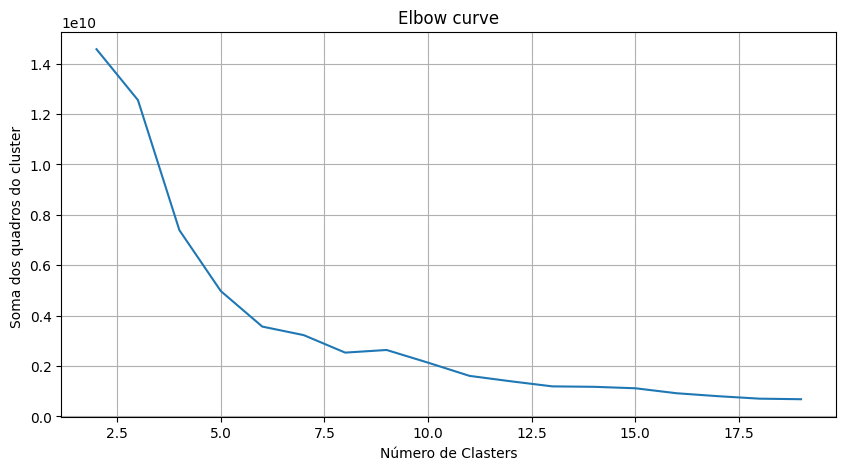

In [63]:
#criando uma lista vazia, que vai guardar os valores da inércia (WCSS) para cada quantidade de clusters
distorsions = []
# for resposável por testar de 2 até 19 clusters
for k in range(2, 20):
#instância do KMeans definindno o número de clusters atual (K) no loop
    kmeans = KMeans(n_clusters=k)
#Treina o modelo usando o KMeans com os dados fornecidos
    kmeans.fit(data)
#salva o valor da inércia(WCSS) para o modelo treinado com K cl
#WCSS = Soma dos quadrados dentro do clusters
    distorsions.append(kmeans.inertia_)

#criando a figura
fig = plt.figure(figsize=(10, 5))

#plota uma linha com os valores de WCSS(inércia) em função do número de clusters
plt.plot(range(2, 20), distorsions)
plt.xlabel('Número de Clasters')
plt.ylabel('Soma dos quadros do cluster ')

#adicionando a grade ao gráfico para facilitar a visualização dos pontos
plt.grid(True)
plt.title('Elbow curve')

Validação do Gráfico

In [64]:
#importando a classe Normalizer, pois a mesma é resposável normlizar os dados.
#ajustando os vetores de modo que tenham um comportamento específico, geralmente 1.
from sklearn.preprocessing import Normalizer

#cria uma instancia do normalizer.
#aplica a normalização nos dados
#extrai os valores númericos, como um array numpy
values = Normalizer().fit_transform(data.values)

In [65]:
#criando uma instância do kmeans
#definindo o número de clusters, com base no gráfico de Elbow Curve
#n_init=10 espefica o número de vezes que o algoritmo será executado com diferentes centroides inicias.
#para escolher o melhor solução
#max_iter = número máximo de iterações
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)

#aplicando o método fit, para treinar o modelo, visando predizer a qual cluster cada ponto pertence
y_pred = kmeans.fit_predict(values)


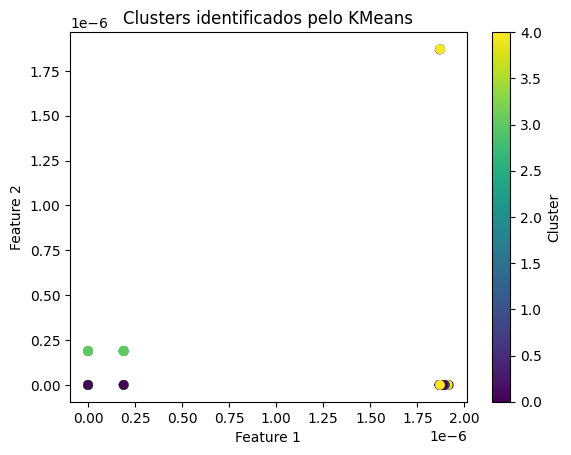

In [66]:
#plotando a maneira em que os dados foram agrupados pelo Kmeans
plt.scatter(values[:, 0], values[:, 1], c=y_pred, cmap='viridis', marker='o')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Clusters identificados pelo KMeans')
plt.colorbar(label='Cluster')
plt.show()

In [67]:
from sklearn import metrics
labels = kmeans.labels_

silhouette = metrics.silhouette_score(values, labels, metric='euclidean')
print(silhouette)

0.6722543761340248


In [68]:
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

0.5237023321378629


In [69]:
calinski = metrics.calinski_harabasz_score(values, labels)

print(calinski)

1481.8573021747102


                          Métricas
Silhouette = tem um intervalo entre -1 e 1 quanto mais próximo de 1 melhor


Devies Bouldin = Quanto mais perto de 0 melhor


Calinski Harabasz = Quanto maior o valor melhor

In [70]:
def clustering_algorithm(n_clusters, data):
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(data)
    s = metrics.silhouette_score(data, labels, metric="euclidean")
    dbs = metrics.davies_bouldin_score(data, labels)
    calinski = metrics.calinski_harabasz_score(data, labels)

    return s, dbs, calinski

In [71]:
s2, dbs2, calinski2 = clustering_algorithm(5, values)
resultado = (
    "Silhouette Score: " + str(s2) + "\n" +
    "Davies-Bouldin Score: " + str(dbs2) + "\n" +
    "Calinski-Harabasz Score: " + str(calinski2)
)
print(resultado)

Silhouette Score: 0.6722543761340248
Davies-Bouldin Score: 0.523702332137863
Calinski-Harabasz Score: 1481.8573021747102


In [72]:
s4, dbs4, calinski4 = clustering_algorithm(15, values)
resultado = (
    "Silhouette Score: " + str(s4) + "\n" +
    "Davies-Bouldin Score: " + str(dbs4) + "\n" +
    "Calinski-Harabasz Score: " + str(calinski4)
)
print(resultado)

Silhouette Score: 0.8335820104778217
Davies-Bouldin Score: 0.18998275619796068
Calinski-Harabasz Score: 15081.609593443665


In [73]:
data.count()

,0
Surgery,299
Age,299
Hospital Number,299
Rectal Temperature,299
Pulse,299
Respiratory Rate,299
Temperature of Extremities,299
Peripheral Pulse,299
Mucous Membranes,299
Capillary Refill Time,299


In [74]:
random_data = np.random.rand(299, 28)

s, dbs, calinski = clustering_algorithm(5, random_data)

resultado = (
    "Silhouette Score: " + str(s) + "\n" +
    "Davies-Bouldin Score: " + str(dbs) + "\n" +
    "Calinski-Harabasz Score: " + str(calinski)+ "\n"
)
print('Modelo Random Numpy'+"\n")
print(resultado)
print('-----------------------------------------'+"\n")
print('Melhor modelo dos testes'+"\n")
resultado = (
    "Silhouette Score: " + str(s4) + "\n" +
    "Davies-Bouldin Score: " + str(dbs4) + "\n" +
    "Calinski-Harabasz Score: " + str(calinski4)
)
print(resultado)


Modelo Random Numpy

Silhouette Score: 0.03277498245934106
Davies-Bouldin Score: 3.7723288881460406
Calinski-Harabasz Score: 8.966494471291327

-----------------------------------------

Melhor modelo dos testes

Silhouette Score: 0.8335820104778217
Davies-Bouldin Score: 0.18998275619796068
Calinski-Harabasz Score: 15081.609593443665


Interpretando os Clusters

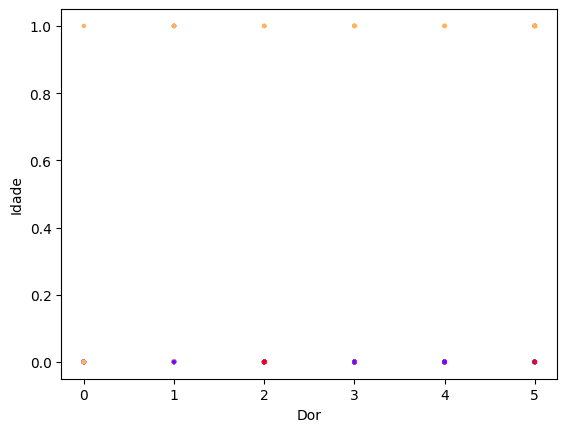

In [75]:
#surgery and pain

plt.scatter(data['Pain'], data['Age'], c=labels, s=5, cmap='rainbow')
plt.xlabel("Dor")
plt.ylabel("Idade")
plt.show()

In [76]:
data["cluster"] = labels
sns.pairplot(data[0:], hue="cluster")

Output hidden; open in https://colab.research.google.com to view.

Usando estatística para observar as varáveis do cluster

In [77]:
data.groupby("cluster").describe()

Surgery                                                  Age  \
          count      mean       std  min   25%  50%  75%  max  count   
cluster                                                                
0         144.0  0.750000  0.434524  0.0  0.75  1.0  1.0  1.0  144.0   
1           6.0  0.666667  0.516398  0.0  0.25  1.0  1.0  1.0    6.0   
2          15.0  0.666667  0.487950  0.0  0.00  1.0  1.0  1.0   15.0   
3          99.0  0.363636  0.483494  0.0  0.00  0.0  1.0  1.0   99.0   
4          35.0  0.628571  0.490241  0.0  0.00  1.0  1.0  1.0   35.0   

                   ... Lesion Subtype         CP Data                      \
             mean  ...            75%     max   count      mean       std   
cluster            ...                                                      
0        0.006944  ...            0.0     0.0   144.0  0.340278  0.475456   
1        0.000000  ...            0.0     0.0     6.0  0.000000  0.000000   
2        0.000000  ...            0.0     0.0    15.0  0.533333  0.516398   
3        0.222222  ...            0.0     0.0    99.0  0.303030  0.461907   
4        0.028571  ...            0.0  2209.0    35.0  0.342857  0.481594   

                                  
         min  25%  50%  75%  max  
cluster                           
0        0.0  0.0  0.0  1.0  1.0  
1        0.0  0.0  0.0  0.0  0.0  
2        0.0  0.0  1.0  1.0  1.0  
3        0.0  0.0  0.0  1.0  1.0  
4        0.0  0.0  0.0  1.0  1.0  

[5 rows x 224 columns]

buscando os melhores atributos com base nos centroides

In [78]:
centroides  = kmeans.cluster_centers_
print(centroides)
#observando a variancia entre os valores de cada cluster


[[ 1.37663881e-06  1.29800987e-08  9.99985308e-01  7.04241379e-05
   3.93971664e-05  5.43070717e-05  3.33195848e-06  5.00650539e-06
   6.80106968e-06  2.64806648e-06  4.94636082e-06  3.03277976e-06
   3.45844332e-06  3.40798286e-06  3.39247846e-06  8.60741293e-06
   3.65929188e-06  4.05446635e-06  8.71816927e-05  4.49245978e-05
   4.02168899e-06  5.78189290e-06  2.41444402e-06  1.49565048e-06
   5.10873738e-03  2.30552187e-04 -8.47032947e-21  6.31605910e-07]
 [ 1.25648354e-06  0.00000000e+00  9.98065117e-01  7.17910355e-05
   4.23900751e-05  6.78897055e-05  3.45683986e-06  5.34018297e-06
   6.59571400e-06  2.51263388e-06  4.71506574e-06  2.51379218e-06
   3.13982633e-06  3.13922690e-06  4.08047276e-06  9.43756059e-06
   3.14204820e-06  2.51082612e-06  7.47680017e-05  1.80234208e-05
   4.39908520e-06  5.72893643e-06  2.51337931e-06  1.57065299e-06
   6.17767057e-02  0.00000000e+00  1.69406589e-21  1.05879118e-22]
 [ 1.25833465e-06  0.00000000e+00  9.99863054e-01  7.28177171e-05
   4.027

calculo da variância nos atributos
Variancia é a medida estatística que indica o quão dispersos ou espalhados estão os valores de um conjunto de dados em relação á média



In [79]:
max = len(centroides[0])

for i in range(max):
  print(data.columns.values[i], "\n{:.4f}".format(centroides[:, i].var()))

Surgery 
0.0000
Age 
0.0000
Hospital Number 
0.0000
Rectal Temperature 
0.0000
Pulse 
0.0000
Respiratory Rate 
0.0000
Temperature of Extremities 
0.0000
Peripheral Pulse 
0.0000
Mucous Membranes 
0.0000
Capillary Refill Time 
0.0000
Pain 
0.0000
Peristalsis 
0.0000
Abdominal Distension 
0.0000
Nasogastric Tube 
0.0000
Nasogastric Reflux 
0.0000
Nasogastric Reflux PH 
0.0000
Rectal Examination Feces 
0.0000
Abdomen 
0.0000
Packed Cell Volume 
0.0000
Total Protein 
0.0000
Abdominocentesis Appearance 
0.0000
Abdominocentesis Total Protein 
0.0000
Outcome 
0.0000
Surgical Lesion 
0.0000
Lesion Site 
0.0005
Lesion Type 
0.0000
Lesion Subtype 
0.0000
CP Data 
0.0000


Lesion Site  151042952.0769

Lesion Type  1186648.9553

Lesion Subtype 15206.7621

Abdomen  1.9551

Packed Cell Volume  51.7851

Total Protein  436.4776

Mucous Membranes  1.0540

Pulse  104.9287

Respiratory Rate  109.3097

Hospital Number  5517870878233.3574

In [80]:
description = data.groupby("cluster")[["Pulse","Respiratory Rate","Mucous Membranes","Total Protein","Packed Cell Volume","Lesion Subtype","Lesion Type","Lesion Site","Abdomen"]]
n_horses = description.size()
description = description.mean()
description['n_horses'] = n_horses
print(description)

             Pulse  Respiratory Rate  Mucous Membranes  Total Protein  \
cluster                                                                 
0        21.194444         29.640820          3.666667      24.068687   
1        22.500000         35.986860          3.500000       9.562406   
2        21.333333         34.092116          4.133333      13.409925   
3        22.101010         30.302108          3.121212      26.654994   
4        22.085714         31.777830          3.228571      25.565650   

         Packed Cell Volume  Lesion Subtype  Lesion Type   Lesion Site  \
cluster                                                                  
0                 46.953498        0.000000   123.152778   3232.152778   
1                 39.666667        0.000000     0.000000  32776.666667   
2                 49.107654        0.000000     0.000000   8573.666667   
3                 44.334082        0.000000     0.000000   1360.202020   
4                 49.169206       63.114286 

**CLUSTER 0**:  Maior quantidade proteina total, Menor localização de lesão, Maior abdomen

-------------------------------------------------------------------------
**CLUSTER 1:** Maior frequência respiratória, Menor quantidade de proteina total, Menor volume de hemacias, Menor valor em tamanho de abdomen, razoavel quantidade de cavalos


-------------------------------------------------------------------------

**CLUSTER 2:**  Menor pulso, Menor frequencia respiratória, maior número de animais

-------------------------------------------------------------------------

**CLUSTER 3:** Maior volume de hemacias
-------------------------------------------------------------------------

**CLUSTER 4:** Maior quantidade de Membranas Mucosas,
